# Cloud Cognitive Environments
Plataforma Azure

## Requerimentos

* Boto3
* Matplotlib
* Pandas
* OS
* Requests
* JSON
* OpenCV
* PIL

## Materiais auxiliares

Baixe o repositório abaixo utilizado o comando indicado. Em caso de atualização, apague o diretório antes e depois clone o repositório.

In [ ]:
# Apagar pasta do repositório
# Faça somente isso se não tenha clonado antes
!rm -rf fiap-ds-cloud-cognitive-environments

In [ ]:
%cd ..

/content


In [ ]:
# Clonar o repositório da aula
!git clone https://github.com/michelpf/fiap-ds-cloud-cognitive-environments

Cloning into 'fiap-ds-cloud-cognitive-environments'...
remote: Enumerating objects: 61, done.
remote: Total 61 (delta 0), reused 0 (delta 0), pack-reused 61
Receiving objects: 100% (61/61), 111.17 MiB | 16.23 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Updating files: 100% (21/21), done.


In [ ]:
%cd fiap-ds-cloud-cognitive-environments/

/content/fiap-ds-cloud-cognitive-environments


# Requerimentos AWS

In [ ]:
# Instalação da biblioteca Boto3, sempre obter a última versão
!pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.5 MB/s eta 0:00:00


In [ ]:
import boto3
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageDraw, ImageFont
import json
import requests

Crie um usuário dedicado para a aula, conforme indicado no material. Após isso, obtenha a chave de identificação (```ACCESS_ID```) e de acesso (```ACCESS_KEY```).

Nunca versione ou disponibilize as chaves de acesso em repositórios, somente (em último caso quando somente você tem acesso) em repositórios privados.

Utilizaremos a região de ```us-east-1```, região mais barata dos serviços da AWS.

In [ ]:
ACCESS_ID = "seu-access-id"
ACCESS_KEY = "sua-chave"
region = "us-east-1"

# Amazon Polly

Serviço para geração de voz a partir de texto.
É compatível com a linguagem de marcação SSML.

Consulte [documentação](https://docs.aws.amazon.com/polly/index.html).

## Audio padrão

Neste exemplo passamos um texto para ser gerado um áudio.
Podemos configurar, entre outras coisas, o texto, o motor de conversão, o formato de saída, o tipo de texto (ou SSML) e a voz para a gravação.

In [ ]:
# abrir sessão
session = boto3.Session(aws_access_key_id=ACCESS_ID, aws_secret_access_key= ACCESS_KEY)

# criar cliente
client = session.client("polly", region_name=region)

# iniciat requisição para atividade de geração de áudio
response = client.start_speech_synthesis_task(
    Engine='neural',
    LanguageCode='pt-BR',
    OutputFormat='mp3',
    OutputS3BucketName='fiap-cognitive-platforms',
    OutputS3KeyPrefix='text-to-audio/',
    Text='Olá, isso é um teste de fala do Polly.',
    TextType='text',
    VoiceId='Camila'
)

response

{'ResponseMetadata': {'RequestId': 'ca50a8b7-5d2e-4062-b09a-eca9835ae3c3',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'ca50a8b7-5d2e-4062-b09a-eca9835ae3c3',
   'content-type': 'application/json',
   'content-length': '527',
   'date': 'Sat, 05 Aug 2023 20:39:30 GMT'},
  'RetryAttempts': 0},
 'SynthesisTask': {'Engine': 'neural',
  'TaskId': '3ecf5549-0d86-45e4-9f15-e5e3188d04af',
  'TaskStatus': 'scheduled',
  'OutputUri': 'https://s3.us-east-1.amazonaws.com/fiap-cognitive-platforms/text-to-audio/.3ecf5549-0d86-45e4-9f15-e5e3188d04af.mp3',
  'CreationTime': datetime.datetime(2023, 8, 5, 20, 39, 31, 287000, tzinfo=tzlocal()),
  'RequestCharacters': 38,
  'OutputFormat': 'mp3',
  'TextType': 'text',
  'VoiceId': 'Camila',
  'LanguageCode': 'pt-BR'}}

## Audio gerado a partir de SSML

No exemplo a seguir utiliza a linguagem de marcação SSML, que permite utilizar efeitos como pausas, tom de voz e outros efeitos.

Consulte [esta referência](https://docs.aws.amazon.com/polly/latest/dg/supportedtags.html) para conhecer todas as tags SSML disponíveis neste serviço.

In [ ]:
# abrir sessão
session = boto3.Session(aws_access_key_id=ACCESS_ID, aws_secret_access_key= ACCESS_KEY)

# criar cliente
client = session.client("polly", region_name=region)

# texto a ser gerado utilizando linguagem de marcação SSML
texto_ssml = """
<speak>
     Boa a noite a todos.<break time="1s"/>Hoje, a aula de Plataformas Cognitivas na
     <sub alias="fiap">FIAP</sub> será realizada com o professor Michel.
     Espero que tenham uma boa aula!
     <amazon:effect name="whispered">"Ah, é uma das minhas disciplinas favoritas!"</amazon:effect>
</speak>
"""

# envio de requisição
response = client.start_speech_synthesis_task(
    Engine='neural',
    LanguageCode='pt-BR',
    OutputFormat='mp3',
    OutputS3BucketName='fiap-cognitive-platforms',
    OutputS3KeyPrefix='text-to-audio/',
    Text=texto_ssml,
    TextType='ssml',
    VoiceId='Camila'
)

# respota do serviço
response

{'ResponseMetadata': {'RequestId': '9caee327-9c6d-4500-b86b-8c8efd12a3e7',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '9caee327-9c6d-4500-b86b-8c8efd12a3e7',
   'content-type': 'application/json',
   'content-length': '528',
   'date': 'Mon, 07 Aug 2023 00:56:20 GMT'},
  'RetryAttempts': 0},
 'SynthesisTask': {'Engine': 'neural',
  'TaskId': '61eedc2b-425a-4c67-8d8d-25ff6ff0765b',
  'TaskStatus': 'scheduled',
  'OutputUri': 'https://s3.us-east-1.amazonaws.com/fiap-cognitive-platforms/text-to-audio/.61eedc2b-425a-4c67-8d8d-25ff6ff0765b.mp3',
  'CreationTime': datetime.datetime(2023, 8, 7, 0, 56, 20, 744000, tzinfo=tzlocal()),
  'RequestCharacters': 184,
  'OutputFormat': 'mp3',
  'TextType': 'ssml',
  'VoiceId': 'Camila',
  'LanguageCode': 'pt-BR'}}

# Amazon Transcribe

Serviço para transcrever em texto a partir de gravações de voz.
É capaz de separar as pessoas que são identificadas na gravação.

Consulte a [documentação](https://docs.aws.amazon.com/transcribe/index.html).

## Transcrição padrão

In [ ]:
# abrir sessão
session = boto3.Session(aws_access_key_id=ACCESS_ID, aws_secret_access_key= ACCESS_KEY)

# criar cliente
client = session.client("transcribe", region_name=region)

response = client.start_transcription_job(
    TranscriptionJobName="PodcastDecodeTranscription",
    LanguageCode="pt-BR",
    MediaFormat="mp3",
    Media={
        "MediaFileUri": "s3://fiap-cognitive-platforms/audio/podcast-decode-fiap/decode-28.mp3",
    },
    OutputBucketName="fiap-cognitive-platforms",
    OutputKey="audio/podcast-decode-fiap/transcription/",
    Settings={
        'ShowSpeakerLabels': True,
        'MaxSpeakerLabels': 3,
        'ChannelIdentification': True,
    },
    JobExecutionSettings={
        "AllowDeferredExecution": True,
        "DataAccessRoleArn": "arn:aws:iam::989944764342:role/ComprehendJob"
    },
    Subtitles={
        'Formats': [
            'vtt','srt',
        ],
    }
)

In [ ]:
response

{'TranscriptionJob': {'TranscriptionJobName': 'PodcastDecodeTranscription',
  'TranscriptionJobStatus': 'IN_PROGRESS',
  'LanguageCode': 'pt-BR',
  'MediaFormat': 'mp3',
  'Media': {'MediaFileUri': 's3://fiap-cognitive-platforms/audio/podcast-decode-fiap/decode-28.mp3'},
  'StartTime': datetime.datetime(2023, 8, 8, 0, 57, 1, 137000, tzinfo=tzlocal()),
  'CreationTime': datetime.datetime(2023, 8, 8, 0, 57, 1, 105000, tzinfo=tzlocal()),
  'Settings': {'ShowSpeakerLabels': True,
   'MaxSpeakerLabels': 3,
   'ChannelIdentification': True},
  'Subtitles': {'Formats': ['vtt', 'srt']}},
 'ResponseMetadata': {'RequestId': 'c670be98-0e65-482b-9269-d519c8b32159',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'c670be98-0e65-482b-9269-d519c8b32159',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '440',
   'date': 'Tue, 08 Aug 2023 00:57:00 GMT'},
  'RetryAttempts': 0}}

In [ ]:
response = client.get_transcription_job(
    TranscriptionJobName="PodcastDecodeTranscription"
)

response

{'TranscriptionJob': {'TranscriptionJobName': 'PodcastDecodeTranscription',
  'TranscriptionJobStatus': 'COMPLETED',
  'LanguageCode': 'pt-BR',
  'MediaSampleRateHertz': 44100,
  'MediaFormat': 'mp3',
  'Media': {'MediaFileUri': 's3://fiap-cognitive-platforms/audio/podcast-decode-fiap/decode-28.mp3'},
  'Transcript': {'TranscriptFileUri': 'https://s3.us-east-1.amazonaws.com/fiap-cognitive-platforms/audio/podcast-decode-fiap/transcription/PodcastDecodeTranscription.json'},
  'StartTime': datetime.datetime(2023, 8, 8, 0, 57, 1, 137000, tzinfo=tzlocal()),
  'CreationTime': datetime.datetime(2023, 8, 8, 0, 57, 1, 105000, tzinfo=tzlocal()),
  'CompletionTime': datetime.datetime(2023, 8, 8, 1, 0, 4, 17000, tzinfo=tzlocal()),
  'Settings': {'ShowSpeakerLabels': True,
   'MaxSpeakerLabels': 3,
   'ChannelIdentification': True,
   'ShowAlternatives': False},
  'JobExecutionSettings': {'AllowDeferredExecution': True,
   'DataAccessRoleArn': 'arn:aws:iam::989944764342:role/ComprehendJob'},
  'Sub

## Analisando resultados

In [ ]:
bucket_name = "fiap-cognitive-platforms"
object_key = "audio/podcast-decode-fiap/transcription/PodcastDecodeTranscription.json"
file_name = "PodcastDecodeTranscription.json"

client = session.client("s3")

response = client.download_file(bucket_name, object_key, file_name)

response

In [ ]:
import json

with open(file_name, 'r') as json_file:
  json_data = json.load(json_file)

In [ ]:
json_data

{'jobName': 'PodcastDecodeTranscription',
 'accountId': '989944764342',
 'results': {'transcripts': [{'transcript': 'salários de até catorze mil na área de A os jornalistas, bem irritados com o Google, com uma nova ferramenta que eles criaram e a greve de Hollywood batendo na inteligência artificial. Esse é o T code Eu sou André Davi, e estou aqui com dois grandes especialistas para bater um papo sobre um dos assuntos mais pedidos do T code, que é a inteligência artificial. Os especialistas são Henrique Ferreira e o salários de até catorze mil na área de A os jornalistas, bem irritados com o Google, com uma nova ferramenta que eles criaram e a greve de Hollywood batendo na inteligência artificial. Esse é o T code Eu sou André Davi, e estou aqui com dois grandes especialistas para bater um papo sobre um dos assuntos mais pedidos do T code, que é a inteligência artificial. Os especialistas são Henrique Ferreira e o Albérico de Castro. É um prazer enorme ter vocês dois. Só que no The Code

In [ ]:
json_data["results"]["transcripts"][0]["transcript"]

'salários de até catorze mil na área de A os jornalistas, bem irritados com o Google, com uma nova ferramenta que eles criaram e a greve de Hollywood batendo na inteligência artificial. Esse é o T code Eu sou André Davi, e estou aqui com dois grandes especialistas para bater um papo sobre um dos assuntos mais pedidos do T code, que é a inteligência artificial. Os especialistas são Henrique Ferreira e o salários de até catorze mil na área de A os jornalistas, bem irritados com o Google, com uma nova ferramenta que eles criaram e a greve de Hollywood batendo na inteligência artificial. Esse é o T code Eu sou André Davi, e estou aqui com dois grandes especialistas para bater um papo sobre um dos assuntos mais pedidos do T code, que é a inteligência artificial. Os especialistas são Henrique Ferreira e o Albérico de Castro. É um prazer enorme ter vocês dois. Só que no The Code ninguém tem nem tempo de respirar, porque os nossos dez minutos começam. Agora, logo no nosso primeiro bloco eu que

In [ ]:
transcricao = json_data["results"]["transcripts"][0]["transcript"]

## Analisando resultado com Comprehend

Detecção de pontos chave, utilizado para identificar palavras chave.

In [ ]:
client = session.client("comprehend", region_name=region)

response = client.detect_key_phrases(
    Text=transcricao,
    LanguageCode='pt',
)

response

{'KeyPhrases': [{'Score': 0.9766974449157715,
   'Text': 'salários de até catorze mil na área de A os jornalistas, bem irritados com o Google, com uma nova ferramenta',
   'BeginOffset': 0,
   'EndOffset': 108},
  {'Score': 0.9958714842796326,
   'Text': 'que',
   'BeginOffset': 109,
   'EndOffset': 112},
  {'Score': 0.9960136413574219,
   'Text': 'eles',
   'BeginOffset': 113,
   'EndOffset': 117},
  {'Score': 0.9986566305160522,
   'Text': 'a greve de Hollywood',
   'BeginOffset': 128,
   'EndOffset': 148},
  {'Score': 0.9851077795028687,
   'Text': 'inteligência artificial',
   'BeginOffset': 160,
   'EndOffset': 183},
  {'Score': 0.9964789748191833,
   'Text': 'Esse',
   'BeginOffset': 185,
   'EndOffset': 189},
  {'Score': 0.931208074092865,
   'Text': 'o T code',
   'BeginOffset': 192,
   'EndOffset': 200},
  {'Score': 0.775880753993988,
   'Text': 'Eu',
   'BeginOffset': 201,
   'EndOffset': 203},
  {'Score': 0.9583021998405457,
   'Text': 'André Davi',
   'BeginOffset': 208,
  

Filtrando entidade cuja pontuação (ou grau de confiança) seja maior que 50%.

In [ ]:
for item in response["KeyPhrases"]:
  if item["Score"] > 0.5:
    print(item["Text"])

salários de até catorze mil na área de A os jornalistas, bem irritados com o Google, com uma nova ferramenta
que
eles
a greve de Hollywood
inteligência artificial
Esse
o T code
Eu
André Davi
dois grandes especialistas
um papo sobre um dos assuntos mais pedidos do T code
que
a inteligência artificial
Os especialistas
Henrique Ferreira
o salários de até catorze mil na área de A os jornalistas, bem irritados com o Google, com
uma nova ferramenta
que
eles
a greve de Hollywood batendo
inteligência artificial
Esse
o T code Eu
André Davi
dois grandes especialistas
um papo sobre um dos assuntos mais pedidos do T code
que
a inteligência artificial
Os especialistas
Henrique Ferreira
o Albérico de Castro
um prazer enorme
vocês
dois
The Code
ninguém
nem tempo
os nossos dez minutos
logo
primeiro bloco
eu
um assunto polêmico
que
a gente
risada
bastidores
Revista Forbes
salários de até catorze mil na área de A sendo
uma nova habilidade
Albérico de Castro
um prazer enorme
vocês
dois
The Code
ninguém
n

Buscando entidades, também utilizado para aperfeiçoar as palavras-chave.

In [ ]:
# criando o cliente
client = session.client("comprehend", region_name=region)

# executando a requisição
response = client.detect_entities(
    Text=transcricao,
    LanguageCode='pt',
)

response

{'Entities': [{'Score': 0.7234151363372803,
   'Type': 'QUANTITY',
   'Text': 'até catorze mil',
   'BeginOffset': 12,
   'EndOffset': 27},
  {'Score': 0.9189767241477966,
   'Type': 'ORGANIZATION',
   'Text': 'Google',
   'BeginOffset': 77,
   'EndOffset': 83},
  {'Score': 0.44337570667266846,
   'Type': 'LOCATION',
   'Text': 'Hollywood',
   'BeginOffset': 139,
   'EndOffset': 148},
  {'Score': 0.8781716823577881,
   'Type': 'TITLE',
   'Text': 'T code',
   'BeginOffset': 194,
   'EndOffset': 200},
  {'Score': 0.9860484004020691,
   'Type': 'PERSON',
   'Text': 'André Davi',
   'BeginOffset': 208,
   'EndOffset': 218},
  {'Score': 0.9274246692657471,
   'Type': 'QUANTITY',
   'Text': 'dois grandes especialistas',
   'BeginOffset': 237,
   'EndOffset': 263},
  {'Score': 0.9009780287742615,
   'Type': 'QUANTITY',
   'Text': 'um dos assuntos mais pedidos',
   'BeginOffset': 289,
   'EndOffset': 317},
  {'Score': 0.8716566562652588,
   'Type': 'TITLE',
   'Text': 'T code',
   'BeginOffse

Filtrando _Score_ maior que 70%, para aumentar a confiança nas entidades.

In [ ]:
for item in response["Entities"]:
  if item["Score"] > 0.7:
    print(item)

{'Score': 0.7234151363372803, 'Type': 'QUANTITY', 'Text': 'até catorze mil', 'BeginOffset': 12, 'EndOffset': 27}
{'Score': 0.9189767241477966, 'Type': 'ORGANIZATION', 'Text': 'Google', 'BeginOffset': 77, 'EndOffset': 83}
{'Score': 0.8781716823577881, 'Type': 'TITLE', 'Text': 'T code', 'BeginOffset': 194, 'EndOffset': 200}
{'Score': 0.9860484004020691, 'Type': 'PERSON', 'Text': 'André Davi', 'BeginOffset': 208, 'EndOffset': 218}
{'Score': 0.9274246692657471, 'Type': 'QUANTITY', 'Text': 'dois grandes especialistas', 'BeginOffset': 237, 'EndOffset': 263}
{'Score': 0.9009780287742615, 'Type': 'QUANTITY', 'Text': 'um dos assuntos mais pedidos', 'BeginOffset': 289, 'EndOffset': 317}
{'Score': 0.8716566562652588, 'Type': 'TITLE', 'Text': 'T code', 'BeginOffset': 321, 'EndOffset': 327}
{'Score': 0.9936051964759827, 'Type': 'PERSON', 'Text': 'Henrique Ferreira', 'BeginOffset': 383, 'EndOffset': 400}
{'Score': 0.8696974515914917, 'Type': 'QUANTITY', 'Text': 'até catorze mil', 'BeginOffset': 417,

Identificando o sentimento geral do documento.
Neste caso estamos truncado o texto devido ao limite da API ser de até 5000 bytes.

In [ ]:
# criando cliente
client = session.client("comprehend", region_name=region)

# limitando o tamanho do texto para caber no limite de 5000 bytes
response = client.detect_sentiment(
    Text=transcricao[:4000],
    LanguageCode='pt',
)

response

{'Sentiment': 'NEUTRAL',
 'SentimentScore': {'Positive': 0.039849765598773956,
  'Negative': 0.010610549710690975,
  'Neutral': 0.9494221210479736,
  'Mixed': 0.00011755369632737711},
 'ResponseMetadata': {'RequestId': '3bb7bfc5-4451-45f3-8cb9-1836ba8de1cd',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '3bb7bfc5-4451-45f3-8cb9-1836ba8de1cd',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '165',
   'date': 'Tue, 08 Aug 2023 01:27:49 GMT'},
  'RetryAttempts': 0}}

# Requerimentos Azure

No Azure os serviços utilizam bibliotecas separadas, portanto elas serão instaladas a medida que aplicamos.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import datetime, json, os, time, uuid, random
import requests
import json
import cv2
from PIL import Image, ImageDraw

Os serviços no Azure sempre são compostos por 2 chaves, `CHAVE 1` e `CHAVE 2`, utilizadas para quando for necessário gerar novas você tem uma a mais de segurança. Além disso, tem um endpoint de acesso (ou `Chave de Extremidade`), da qual podemos interagir com o serviço diretamente via API Restful.

Também é comum utilizarmos bibliotecas que tornam o acesso ao endpoint mais simplificado.

# Azure Language Service

## Requerimentos

Instalaremos a biblioteca `azure-ai-textanalytics` para interagir com o serviço. Para saber mais detalhes, consulte a [documentação](https://pypi.org/project/azure-ai-textanalytics/).

In [ ]:
!pip install azure-ai-textanalytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.6/298.6 kB 4.6 MB/s eta 0:00:00


Importação das bibliocas do pacote instalado.

In [ ]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.textanalytics import TextAnalyticsClient

Os dados de chave (uma das duas) e endpoint (ou ponto de extremidade) são encontrados na página de `Chaves e Ponto de Extremidade`.

In [ ]:
text_analytics_key = "sua-chave"
text_analytics_endpoint = "seu-endpoint"

In [ ]:
# Aplicando a credencial de acesso
credential = AzureKeyCredential(text_analytics_key)

# Criar o client para utilizar o serviço
text_analytics_client = TextAnalyticsClient(endpoint=text_analytics_endpoint, credential=credential)

In [ ]:
texto = [
"Bem-vindos ao curso de Visão Computacional em Análise Facial. Meu nome é Michel e nesse curso vamos aprender a analisar alguns aspectos bem interessantes em imagens e vídeos em relação à faces e rostos."
"Ou seja, dada uma imagem, será que conseguimos extrair o que há de mais importante naquilo? Então naquela imagem eu preciso ter alguma forma de extrair aquilo que eu tenho interesse, ou seja, o rosto da pessoa."
"Então temos esse tipo de aplicação muito comum na China e até mesmo no Brasil, só para dar alguns exemplos - onde temos por exemplo: uma imagem cheia de pessoas e cheia de rostos mas eu não preciso me preocupar se a pessoa está vestida de um determinado tipo de roupa, se ela está carregando uma mochila."
"Ou se tem um poste na rua ou se tem uma calçada. Meu único objetivo em análise facial são as faces então vamos aprender como é que, dada uma imagem, eu consigo extrair a face."
"Vamos aprender como podemos utilizar os classificadores de cascata de Haar para essa finalidade, ou seja, para extrema região de interesse. Uma vez que eu tenho essa região de interesse já definida, posso fazer esse recorte e com esse recorte nessa região de interesse, eu posso, por exemplo, utilizar modelos de Machine Learning para poder inferir e para poder testar se aquela face é de uma determinada pessoa."
"Para isso vamos ter também a oportunidade de construir classificadores baseados em diferentes algoritmos de Machine Learning e visão computacional para faces, que são os algoritmos Eigenfaces, FisherFaces e até o LBPH."
"E com isso seremos capazes de construirmos o próprio classificador utilizando um “dataset” que é bem comum, que é o dataset do pessoal da Georgia Tech, onde temos vários exemplos com várias pessoas, com várias imagens e temos condições de treinar o nosso modelo."
"E depois até mesmo validar se ele realmente está inferindo bem com as imagens de teste que vamos separar para poder de fato verificar se o nosso classificador está bom ou se não está."
"Além disso, também vamos estudar: dada uma imagem, vamos conseguir o extrair o que chamamos de “marcos faciais”. Os marcos faciais são obtidos por meio de uma biblioteca que é muito conhecida no ramo, que é a Dlib."
"A Dlib possui alguns classificadores já pré-treinados que conseguem extrair 68 pontos que delimitam regiões do rosto. Quais são essas regiões? Os olhos, o nariz, a boca, aqui no queixo, e com isso é possível verificarmos a abertura e fechamento da boca. Só para dar um exemplo para vocês, nessa imagem aqui temos esses pontos delimitados, são os 68 pontos que eu comentei."
"Então cada um desses pontos reúnem uma determinada região do rosto: a sobrancelha, os olhos, a boca e o nariz. Com isso somos capazes inclusive, dado um vídeo, podemos verificar se uma pessoa está bocejando, se ela está com o olho aberto ou com o olho fechado."
"Seria algo mais ou menos igual fizemos aqui, que vocês vão estudar, por exemplo: eu tenho um vídeo e pegamos esses mesmos marcos faciais e começamos a fazer análise em tempo real, frame by frame, porque estamos trabalhando com vídeo."
"Então com isso eu consigo, por exemplo, determinar por aspecto de razão as medidas de abertura e fechamento da boca, que inclusive eles invariam com a escala, ou seja, se eu aproximar ou se eu também me afastar do vídeo, eu consigo manter as medidas quase que intactas porque as medidas de aspecto de razão eliminam um pouco esse efeito de distorção de aproximação ou de afastamento."
"Tem bastante coisa legal. Eu espero que vocês gostem desse conteúdo e eu faço o convite: por que não começar agora!? Conto com vocês pessoal, até mais!"
]

# Chamando o serviço para sumarizar
text_summary = text_analytics_client.begin_abstract_summary(texto, language="pt")

## Sumarização de texto

In [ ]:
# Armazenando resultados
summary_results = text_summary.result()

In [ ]:
for i in text_summary.result():
  print(i)

{'id': '0', 'warnings': [], 'statistics': None, 'summaries': [AbstractiveSummary(text=O curso de Visão Computacional em Análise Facial é feito pelo especialista em análise facial Michel Oliveira. O curso é feito com o objetivo de aprender a analisar alguns aspectos bem interessantes em imagens e vídeos em relação à faces e rostos., contexts=[SummaryContext(offset=0, length=3579)])], 'is_error': False, 'kind': 'AbstractiveSummarization'}


Analisando resultados.

In [ ]:
for result in summary_results:
  print(result)
  for summary in result.summaries:
    print(summary.text)

{'id': '0', 'warnings': [], 'statistics': None, 'summaries': [AbstractiveSummary(text=O curso de Visão Computacional em Análise Facial é feito pelo especialista em análise facial Michel Oliveira. O curso é feito com o objetivo de aprender a analisar alguns aspectos bem interessantes em imagens e vídeos em relação à faces e rostos., contexts=[SummaryContext(offset=0, length=3579)])], 'is_error': False, 'kind': 'AbstractiveSummarization'}
O curso de Visão Computacional em Análise Facial é feito pelo especialista em análise facial Michel Oliveira. O curso é feito com o objetivo de aprender a analisar alguns aspectos bem interessantes em imagens e vídeos em relação à faces e rostos.


In [ ]:
# Chamando o serviço para realizar o abstract
text_abstract = text_analytics_client.begin_extract_summary(texto, max_sentence_count=5, language="pt")

In [ ]:
# Armazenando resultados
extract_summary_results = text_abstract.result()

In [ ]:
abstract = ""
for result in extract_summary_results:
  for sentence in result.sentences:
    print(sentence)
    abstract += " " + sentence.text

{'text': 'Bem-vindos ao curso de Visão Computacional em Análise Facial.', 'rank_score': 1.0, 'offset': 0, 'length': 61}
{'text': 'Meu nome é Michel e nesse curso vamos aprender a analisar alguns aspectos bem interessantes em imagens e vídeos em relação à faces e rostos.', 'rank_score': 0.73, 'offset': 62, 'length': 140}
{'text': 'Meu único objetivo em análise facial são as faces então vamos aprender como é que, dada uma imagem, eu consigo extrair a face.', 'rank_score': 0.59, 'offset': 765, 'length': 126}
{'text': 'Para isso vamos ter também a oportunidade de construir classificadores baseados em diferentes algoritmos de Machine Learning e visão computacional para faces, que são os algoritmos Eigenfaces, FisherFaces e até o LBPH.', 'rank_score': 0.58, 'offset': 1303, 'length': 218}
{'text': 'Além disso, também vamos estudar: dada uma imagem, vamos conseguir o extrair o que chamamos de “marcos faciais”.', 'rank_score': 0.58, 'offset': 1966, 'length': 112}


In [ ]:
abstract

' Bem-vindos ao curso de Visão Computacional em Análise Facial. Meu nome é Michel e nesse curso vamos aprender a analisar alguns aspectos bem interessantes em imagens e vídeos em relação à faces e rostos. Meu único objetivo em análise facial são as faces então vamos aprender como é que, dada uma imagem, eu consigo extrair a face. Para isso vamos ter também a oportunidade de construir classificadores baseados em diferentes algoritmos de Machine Learning e visão computacional para faces, que são os algoritmos Eigenfaces, FisherFaces e até o LBPH. Além disso, também vamos estudar: dada uma imagem, vamos conseguir o extrair o que chamamos de “marcos faciais”.'

## Azure Question Answering and Conversacional Language

Serviço de perguntas e respostas associado a serviço de reconhecimento de linguagem conversacional.

A construção de base de conhecimento é feito diretamente no [Language Studio](https://language.cognitive.azure.com/questionAnswering).

Depois de construir a base de conhecimento e realizar a implementação da mesma, teremos acesso a uma `Prediction URL` que utilizaremos para integração com qualquer sistema ou seguir para a construção de um chatbot utilizando o LUIS.

Vamos utilizar a biblioteca [Requests](https://requests.readthedocs.io/en/latest/) para as interações com as APIs.

No exemplo abaixo vamos simular a busca de uma pergunta na API, que poderia ser integrado em qualquer sistema.

In [ ]:
import requests

# Endpoint do serviço
# Neste temos a rota do nosso projeto, portanto não é a mesma utilizada na extremidade do serviço
url = "https://language-service-fiap.cognitiveservices.azure.com/language/:query-knowledgebases?projectName=alura-faq&api-version=2021-10-01&deploymentName=production"

# Cabeçalho incluindo a chave de utilização, a mesma que utilizamos
headers = { "Ocp-Apim-Subscription-Key" : text_analytics_key,
            "Content-Type": "application/json"}

# O payload é padronizado, podemos incluir:
# o número de perguntas,
# a questão
# incluir dados não estruturados
# e por fim trazer mais perguntas (abrir o leque de perguntas para ampliar a busca)

payload = {
    "top": 3,
    "question": "como funciona meu caderno?",
    "includeUnstructuredSources": True,
    "confidenceScoreThreshold": 0.5,
    "answerSpanRequest": {
        "enable":True,
        "topAnswersWithSpan":1,
        "confidenceScoreThreshold":0.5
        }
    }

# A requisição é feita por um método padronizado do tipo post
resposta = requests.post(url, json = payload, headers=headers)

print(resposta.text)

{
  "answers": [
    {
      "questions": [
        "Meu Caderno, como funciona?"
      ],
      "answer": "Desenvolvemos o caderno para centralizar suas anotações de aula em um único lugar, para te ajudar com informações sobre aquela aula.\n\nEsse caderno fica disponível no curso conforme imagem abaixo:\n\nNele você pode criar anotações sobre o seu curso e o melhor: só fica disponível para você.\n\nRealizando anotações no caderno do curso, você poderá acessar suas anotações através da barra de menu principal, no canto direito superior da tela onde aparece o seu nome, clique na opção “meus cadernos”.\n\nSe tiver alguma outra sugestão ou quiser dar qualquer tipo de feedback, basta entrar em contato com a equipe da Alura.",
      "confidenceScore": 0.99,
      "id": 4,
      "source": "https://www.alura.com.br/faq-unibb",
      "metadata": {},
      "dialog": {
        "isContextOnly": false,
        "prompts": []
      }
    }
  ]
}


# Azure Content Safety

Serviço responsável por avaliar segurança de conteúdos com o objetivo de evitar conteúdos abusivos e inapropriados em texto ou imagem de serem compartilhados por usuários.

Consulte a [documentação](https://azure.microsoft.com/en-us/products/ai-services/ai-content-safety) para mais detalhes de aplicações e nesta [referência](https://learn.microsoft.com/en-us/python/api/overview/azure/ai-contentsafety-readme?view=azure-python-preview) exemplos de utilizações.

## Requerimentos

Vamos utilizar a biblioteca ```azure-ai-contetsafety``` que permite acessar as APIs do serviço de uma forma mais simplificada.

In [ ]:
!pip install azure-ai-contentsafety

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.4/192.4 kB 15.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.8.0 which is incompatible.


Importação de bibliotecas para utilização.

In [ ]:
from azure.ai.contentsafety import ContentSafetyClient
from azure.core.exceptions import HttpResponseError
from azure.ai.contentsafety.models import AnalyzeTextOptions, TextCategory
from azure.core.credentials import AzureKeyCredential

Os dados de chave (uma das duas) e endpoint (ou ponto de extremidade) são encontrados na página de `Chaves e Ponto de Extremidade`.

In [ ]:
content_safety_endpoint = "sua-chave"
content_safety_key = "seu-endpoint"

## Análise de texto

Busca por conteúdos de ódio, auto lesão, sexual e violência a partir de textos, associando severidade a cada detecção de modo a ponderar cada tipo de de conteúdo encontrado.

In [ ]:
# Credencial para autenticação do serviço
content_safety_credential = AzureKeyCredential(content_safety_key)

# Criação do cliente para interação com o serviço
content_safety_client = ContentSafetyClient(content_safety_endpoint, content_safety_credential)

# Texto a ser analisado
texto = "Você é um imbecil. Deveria tirar a própria vida."

# Exemplo neutro
#texto = "Nada demais acontece por aqui, devido as instituições de segurança e política."

# Carregando a requisição com as categorias
# Podemos selecionar quais categorias e incluir no parâmetro categories=[TextCategory.HATE, TextCategory.SELF_HARM]
request_content = AnalyzeTextOptions(text=texto)

response = content_safety_client.analyze_text(request_content)

response

{'blocklistsMatchResults': [], 'hateResult': {'category': 'Hate', 'severity': 2}, 'selfHarmResult': {'category': 'SelfHarm', 'severity': 4}, 'sexualResult': {'category': 'Sexual', 'severity': 0}, 'violenceResult': {'category': 'Violence', 'severity': 0}}

In [ ]:
print("Hate severity: ", response.hate_result.severity, "SelfHarm severity: ", response.self_harm_result.severity)

Hate severity:  2 SelfHarm severity:  4


## Análise de imagem

Análise de dos mesmos grupos de segurança encontrados em texto para imagens.

Importação das bibliotecas utilizadas.

In [ ]:
from azure.ai.contentsafety.models import AnalyzeImageOptions, ImageData

Vamos analisar esta imagem.

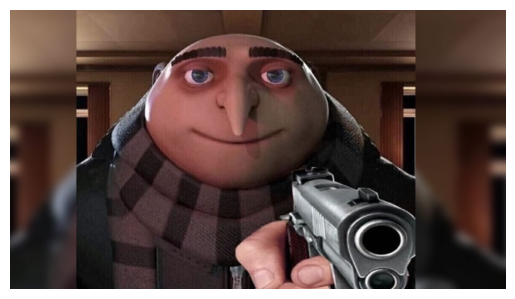

In [ ]:
caminho_imagem = "gru.jpg"
#caminho_imagem = "violencia.jpg"

img = mpimg.imread(caminho_imagem)
imgplot = plt.imshow(img)

plt.axis('off')
plt.show()

Podemos utilizar o cliente já criado no exemplo anterior.

In [ ]:
# criando a requisição com a imagem em formato binário
with open(caminho_imagem, "rb") as file:
  request = AnalyzeImageOptions(image=ImageData(content=file.read()))

In [ ]:
# Enviando a requisição para análise
resultado = content_safety_client.analyze_image(request)

resultado

{'hateResult': {'category': 'Hate', 'severity': 0}, 'selfHarmResult': {'category': 'SelfHarm', 'severity': 0}, 'sexualResult': {'category': 'Sexual', 'severity': 0}, 'violenceResult': {'category': 'Violence', 'severity': 2}}

In [ ]:
if resultado.hate_result:
  print("Hate severity: ", response.hate_result.severity)
if resultado.self_harm_result:
  print("SelfHarm severity: ", response.self_harm_result.severity)
if resultado.sexual_result:
  print("Sexual severity: ", response.sexual_result.severity)
if resultado.violence_result:
  print("Violence severity: ", response.violence_result.severity)

Hate severity:  2
SelfHarm severity:  4
Sexual severity:  0
Violence severity:  0


## Blocos de listas customizados

Quando há palavras e termos que podem ser disfarçados trocando letras por caracteres similares, exemplo i por 1, A por 4 ou ocultações.

Nestes casos podemos criar listas de palavras para incluir estes termos.

Importação das bibliotecas

In [ ]:
from azure.ai.contentsafety.models import AnalyzeTextOptions
from azure.ai.contentsafety.models import TextBlockItemInfo
from azure.ai.contentsafety.models import AddBlockItemsOptions

In [ ]:
# Nome da lista de bloqueio
blocklist_name = "BlocklistPtBr"
# Descrição da lista de bloqueio
blocklist_description = "Blocklist Portuguese-Brazilian"

blocklist = content_safety_client.create_or_update_text_blocklist(blocklist_name=blocklist_name, resource={"description": blocklist_description})
blocklist

{'blocklistName': 'BlocklistPtBr', 'description': 'Blocklist Portuguese-Brazilian'}

In [ ]:
blocklist_name = "BlocklistPtBr"

block_item_text_1 = "mort#"
block_item_text_2 = "su1c1d10"

block_items = [TextBlockItemInfo(text=block_item_text_1), TextBlockItemInfo(text=block_item_text_2), TextBlockItemInfo(text=block_item_text_3)]

resultado = content_safety_client.add_block_items(blocklist_name=blocklist_name, body=AddBlockItemsOptions(block_items=block_items))

resultado


Block items added: 
BlockItemId: 90e97494-463f-44b7-94f5-88c83e2eaeef, Text: mort#, Description: None
BlockItemId: 60be17a9-454d-4906-bc28-f58e5643b92e, Text: su1c1d10, Description: None


In [ ]:
block_item_text_3 = "mort3"

block_items = [TextBlockItemInfo(text=block_item_text_3)]

resultado = content_safety_client.add_block_items(blocklist_name=blocklist_name, body=AddBlockItemsOptions(block_items=block_items))

resultado

{'value': [{'blockItemId': '5c9892c9-6d63-4b6e-9bc0-8fac72e4cb74', 'text': 'mort3'}]}

In [ ]:
texto = "Pessoas podem gostar de mort3 e fazer su1c1d10."

resultado = content_safety_client.analyze_text(AnalyzeTextOptions(text=texto, blocklist_names=[blocklist_name]))
resultado

{'blocklistsMatchResults': [{'blocklistName': 'BlocklistPtBr', 'blockItemId': '5c9892c9-6d63-4b6e-9bc0-8fac72e4cb74', 'blockItemText': 'mort3', 'offset': 24, 'length': 5}, {'blocklistName': 'BlocklistPtBr', 'blockItemId': '60be17a9-454d-4906-bc28-f58e5643b92e', 'blockItemText': 'su1c1d10', 'offset': 38, 'length': 8}], 'hateResult': {'category': 'Hate', 'severity': 0}, 'selfHarmResult': {'category': 'SelfHarm', 'severity': 0}, 'sexualResult': {'category': 'Sexual', 'severity': 0}, 'violenceResult': {'category': 'Violence', 'severity': 0}}

In [ ]:
for match_result in resultado.blocklists_match_results:
  print(f"Block item was hit in text, Offset={match_result.offset}, Length={match_result.length}.")
  print(f"BlocklistName: {match_result.blocklist_name}, BlockItemId: {match_result.block_item_id}, BlockItemText: {match_result.block_item_text}")

Block item was hit in text, Offset=24, Length=5.
BlocklistName: BlocklistPtBr, BlockItemId: 5c9892c9-6d63-4b6e-9bc0-8fac72e4cb74, BlockItemText: mort3
Block item was hit in text, Offset=38, Length=8.
BlocklistName: BlocklistPtBr, BlockItemId: 60be17a9-454d-4906-bc28-f58e5643b92e, BlockItemText: su1c1d10


# Azure Machine Learning Studio

O Azure Machine Learning Studio é uma plataforma para armazenar e catalogar datasets, treinar difernetes tipos de modelo de aprendizado de máquina, incluido técnicas de AutoML e também armazenar e implantar modelos para consumo em aplicações web, tempo real ou batch.


## Consumo de API Web em Endpoint

In [ ]:
import requests

In [ ]:
data =  {
  "Inputs": {
    "data": [
      {
        "radius_mean": 15.0,
        "texture_mean": 10.0,
        "perimeter_mean": 100.0,
        "area_mean": 1.0,
        "smoothness_mean": 0.2,
        "compactness_mean": 0.2,
        "concavity_mean": 0.3,
        "concave points_mean": 0.1,
        "symmetry_mean": 0.2,
        "fractal_dimension_mean": 0.05,
        "radius_se": 1.2,
        "texture_se": 1.0,
        "perimeter_se": 9.0,
        "area_se": 150.0,
        "smoothness_se": 0.03,
        "compactness_se": 0.7,
        "concavity_se": 0.5,
        "concave points_se": 0.01,
        "symmetry_se": 0.02,
        "fractal_dimension_se": 0.05,
        "radius_worst": 30.0,
        "texture_worst": 20.0,
        "perimeter_worst": 200.0,
        "area_worst": 2.0,
        "smoothness_worst": 0.1,
        "compactness_worst": 0.8,
        "concavity_worst": 1.0,
        "concave points_worst": 0.5,
        "symmetry_worst": 0.5,
        "fractal_dimension_worst": 0.2

      }
    ]
  },
  "GlobalParameters": {
    "method": "predict"
  }
}

In [ ]:
data = json.dumps(data)
data

'{"Inputs": {"data": [{"radius_mean": 15.0, "texture_mean": 10.0, "perimeter_mean": 100.0, "area_mean": 1.0, "smoothness_mean": 0.2, "compactness_mean": 0.2, "concavity_mean": 0.3, "concave points_mean": 0.1, "symmetry_mean": 0.2, "fractal_dimension_mean": 0.05, "radius_se": 1.2, "texture_se": 1.0, "perimeter_se": 9.0, "area_se": 150.0, "smoothness_se": 0.03, "compactness_se": 0.7, "concavity_se": 0.5, "concave points_se": 0.01, "symmetry_se": 0.02, "fractal_dimension_se": 0.05, "radius_worst": 30.0, "texture_worst": 20.0, "perimeter_worst": 200.0, "area_worst": 2.0, "smoothness_worst": 0.1, "compactness_worst": 0.8, "concavity_worst": 1.0, "concave points_worst": 0.5, "symmetry_worst": 0.5, "fractal_dimension_worst": 0.2}]}, "GlobalParameters": {"method": "predict"}}'

In [ ]:
url = 'http://040d6c9d-32b8-4e39-9f55-54a77d467b69.southcentralus.azurecontainer.io/score'

api_key = 'sua-chave'

In [ ]:
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

result = requests.post(url=url, headers=headers, data=data)

In [ ]:
result, result.text

(<Response [200]>, '{"Results": ["M"]}')